In [51]:
import sys
import os
os.environ['PROJ_DATA'] = "/pscratch/sd/p/plutzner/proj_data"
import xarray as xr
import torch
import torchinfo
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cartopy.crs as ccrs
import json
import pickle
import gzip
from utils import utils

from shash.shash_torch import Shash
from model.build_model import TorchModel
import torch

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")
print(f"pytorch version = {torch.__version__}")

# https://github.com/victoresque/pytorch-template/tree/master

python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy version = 1.26.4
xarray version = 2024.2.0
pytorch version = 2.1.2.post2


In [43]:
# OPEN ORIGINAL EXP006_V5 SHASH OUTPUTS:
with gzip.open('/Users/C830793391/Documents/Research/E3SM/saved/output/exp006_output_pred_testset.pkl') as f:
    exp006_output_V5 = pickle.load(f)

# OPEN 12-12-2024 SHASH OUTPUTS:
with gzip.open('/Users/C830793391/Documents/Research/E3SM/saved/output/exp006_output_pred_testset_DEC2024_RERUN.pkl') as f:
    exp006_output_12_12_2024 = pickle.load(f)


In [44]:
if np.array_equal(exp006_output_V5, exp006_output_12_12_2024):
    print('Output SHASH parameters are identical')
else:
    print('Output SHASH parameters are NOT identical')

Output SHASH parameters are NOT identical


shape of probability distribution V5: (250, 60058)
shape of probability distribution RERUN: (250, 60058)


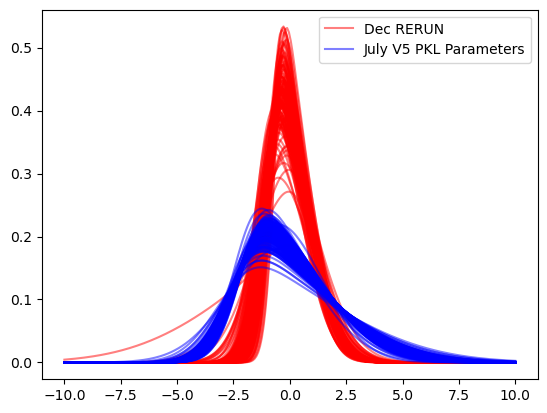

In [100]:
# SHASH Parameters to Probability Distributions: 

x = np.linspace(-10, 10, 250)
samples = range(0, 60000, 400)

dist_V5 = Shash(exp006_output_V5)
p_V5 = dist_V5.prob(x).numpy()
print(f"shape of probability distribution V5: {p_V5.shape}")

dist_RERUN = Shash(exp006_output_12_12_2024)
p_RERUN = dist_RERUN.prob(x).numpy()
print(f"shape of probability distribution RERUN: {p_RERUN.shape}")

# PLOT: 
plt.figure()

plt.plot(x, p_RERUN[:, samples], alpha=0.5, color='r')
plt.plot(x, p_RERUN[:, 5], alpha=0.5, color='r', label = 'Dec RERUN')
plt.plot(x, p_V5[:, samples], alpha=0.5, color='b')
plt.plot(x, p_V5[:, 5], alpha=0.5, color='b', label = 'July V5 PKL Parameters')
plt.legend()

### Compare Model Weights: 


In [96]:
config = utils.get_config("exp006")

# EXP006 v5 Model Weights: 
pathv5 = '/Users/C830793391/Documents/Research/E3SM/saved/models/exp006_v5.pth'
modelv5 = TorchModel(config=config["arch"])
modelv5.load_state_dict(torch.load(pathv5))
v5_params = []
for a, b in modelv5.named_parameters():
    v5_params.append(a)
    v5_params.append(b)

print(v5_params)

['layer1.weight', Parameter containing:
tensor([[-0.1172, -0.1828,  0.2390],
        [ 0.2008, -0.2431, -0.0478],
        [-0.1656,  0.1094, -0.2053],
        [ 0.2886,  0.2064,  0.0282],
        [-0.4036, -0.1266,  0.0210],
        [-0.2846,  0.3039, -0.3293]], requires_grad=True), 'layer1.bias', Parameter containing:
tensor([ 0.5652, -0.4764,  0.4389, -0.2531,  0.3318,  0.3171],
       requires_grad=True), 'layer2.weight', Parameter containing:
tensor([[ 0.0171,  0.0761,  0.3100,  0.1050,  0.2166, -0.3158],
        [ 0.2906,  0.1405,  0.1034,  0.0564,  0.1990,  0.3749],
        [-0.0908, -0.2274, -0.1027, -0.2488,  0.1964, -0.2018],
        [-0.2179,  0.3522,  0.3736,  0.0470, -0.0707, -0.0527],
        [ 0.1934, -0.3812, -0.3336,  0.3261,  0.4030, -0.0243],
        [-0.3226,  0.0112, -0.1899, -0.0008,  0.1998,  0.1807]],
       requires_grad=True), 'layer2.bias', Parameter containing:
tensor([-0.0479,  0.0449,  0.1111, -0.3200, -0.1384,  0.0160],
       requires_grad=True), 'final.w

In [97]:
# exp006 RERUN Model Weights: 
path_rr = '/Users/C830793391/Documents/Research/E3SM/saved/models/exp006_v5_DEC2024_RERUN.pth'
model_RERUN = TorchModel(config=config["arch"])
model_RERUN.load_state_dict(torch.load(path_rr))
RERUN_params = []
for c, d in model_RERUN.named_parameters():
    RERUN_params.append(c)
    RERUN_params.append(d)

print(RERUN_params)

['layer1.weight', Parameter containing:
tensor([[-0.1172, -0.1828,  0.2390],
        [ 0.2008, -0.2431, -0.0478],
        [-0.1656,  0.1094, -0.2053],
        [ 0.2886,  0.2064,  0.0282],
        [-0.4036, -0.1266,  0.0210],
        [-0.2846,  0.3039, -0.3293]], requires_grad=True), 'layer1.bias', Parameter containing:
tensor([ 0.5652, -0.4764,  0.4389, -0.2531,  0.3318,  0.3171],
       requires_grad=True), 'layer2.weight', Parameter containing:
tensor([[ 0.0171,  0.0761,  0.3100,  0.1050,  0.2166, -0.3158],
        [ 0.2906,  0.1405,  0.1034,  0.0564,  0.1990,  0.3749],
        [-0.0908, -0.2274, -0.1027, -0.2488,  0.1964, -0.2018],
        [-0.2179,  0.3522,  0.3736,  0.0470, -0.0707, -0.0527],
        [ 0.1934, -0.3812, -0.3336,  0.3261,  0.4030, -0.0243],
        [-0.3226,  0.0112, -0.1899, -0.0008,  0.1998,  0.1807]],
       requires_grad=True), 'layer2.bias', Parameter containing:
tensor([-0.0479,  0.0449,  0.1111, -0.3200, -0.1384,  0.0160],
       requires_grad=True), 'final.w

In [98]:
print(f"v5_params: {v5_params}")
print(f"RERUN_params: {RERUN_params}")

v5_params: ['layer1.weight', Parameter containing:
tensor([[-0.1172, -0.1828,  0.2390],
        [ 0.2008, -0.2431, -0.0478],
        [-0.1656,  0.1094, -0.2053],
        [ 0.2886,  0.2064,  0.0282],
        [-0.4036, -0.1266,  0.0210],
        [-0.2846,  0.3039, -0.3293]], requires_grad=True), 'layer1.bias', Parameter containing:
tensor([ 0.5652, -0.4764,  0.4389, -0.2531,  0.3318,  0.3171],
       requires_grad=True), 'layer2.weight', Parameter containing:
tensor([[ 0.0171,  0.0761,  0.3100,  0.1050,  0.2166, -0.3158],
        [ 0.2906,  0.1405,  0.1034,  0.0564,  0.1990,  0.3749],
        [-0.0908, -0.2274, -0.1027, -0.2488,  0.1964, -0.2018],
        [-0.2179,  0.3522,  0.3736,  0.0470, -0.0707, -0.0527],
        [ 0.1934, -0.3812, -0.3336,  0.3261,  0.4030, -0.0243],
        [-0.3226,  0.0112, -0.1899, -0.0008,  0.1998,  0.1807]],
       requires_grad=True), 'layer2.bias', Parameter containing:
tensor([-0.0479,  0.0449,  0.1111, -0.3200, -0.1384,  0.0160],
       requires_grad=True